*Original Data Source*: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing (fourth dataset is used)

*Abstract*: The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.

In [233]:
from google.colab import drive
drive.mount('/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
path = '/drive/My Drive/github/data/bank.csv'
df = pd.read_csv(path)

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [234]:
df['y'].value_counts(normalize=True)

no     0.88476
yes    0.11524
Name: y, dtype: float64

In [235]:
df.shape

(4521, 17)

In [236]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [237]:
df.head(1)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [239]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


age            AxesSubplot(0.125,0.125;0.0945122x0.755)
balance     AxesSubplot(0.238415,0.125;0.0945122x0.755)
day         AxesSubplot(0.351829,0.125;0.0945122x0.755)
duration    AxesSubplot(0.465244,0.125;0.0945122x0.755)
campaign    AxesSubplot(0.578659,0.125;0.0945122x0.755)
pdays       AxesSubplot(0.692073,0.125;0.0945122x0.755)
previous    AxesSubplot(0.805488,0.125;0.0945122x0.755)
dtype: object

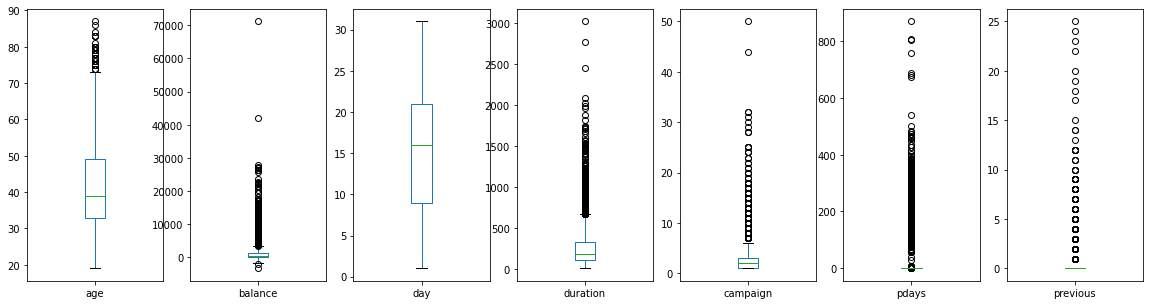

In [240]:
numerical_cols_to_plot = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'] 
df[numerical_cols_to_plot].plot.box(subplots=True, layout=(1,7), figsize=(20,5))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f84de355cd0>,
      dtype=object)

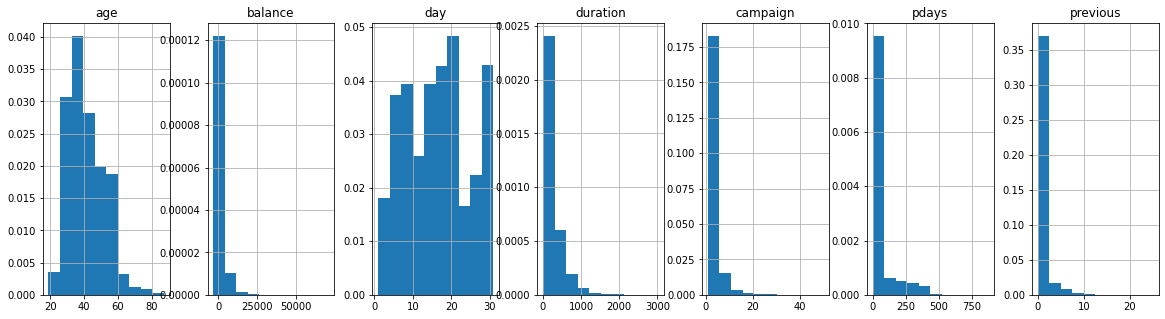

In [241]:
numerical_cols_to_plot = ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_cols_to_plot].hist(density=True, layout=(1,7), figsize=(20,5))

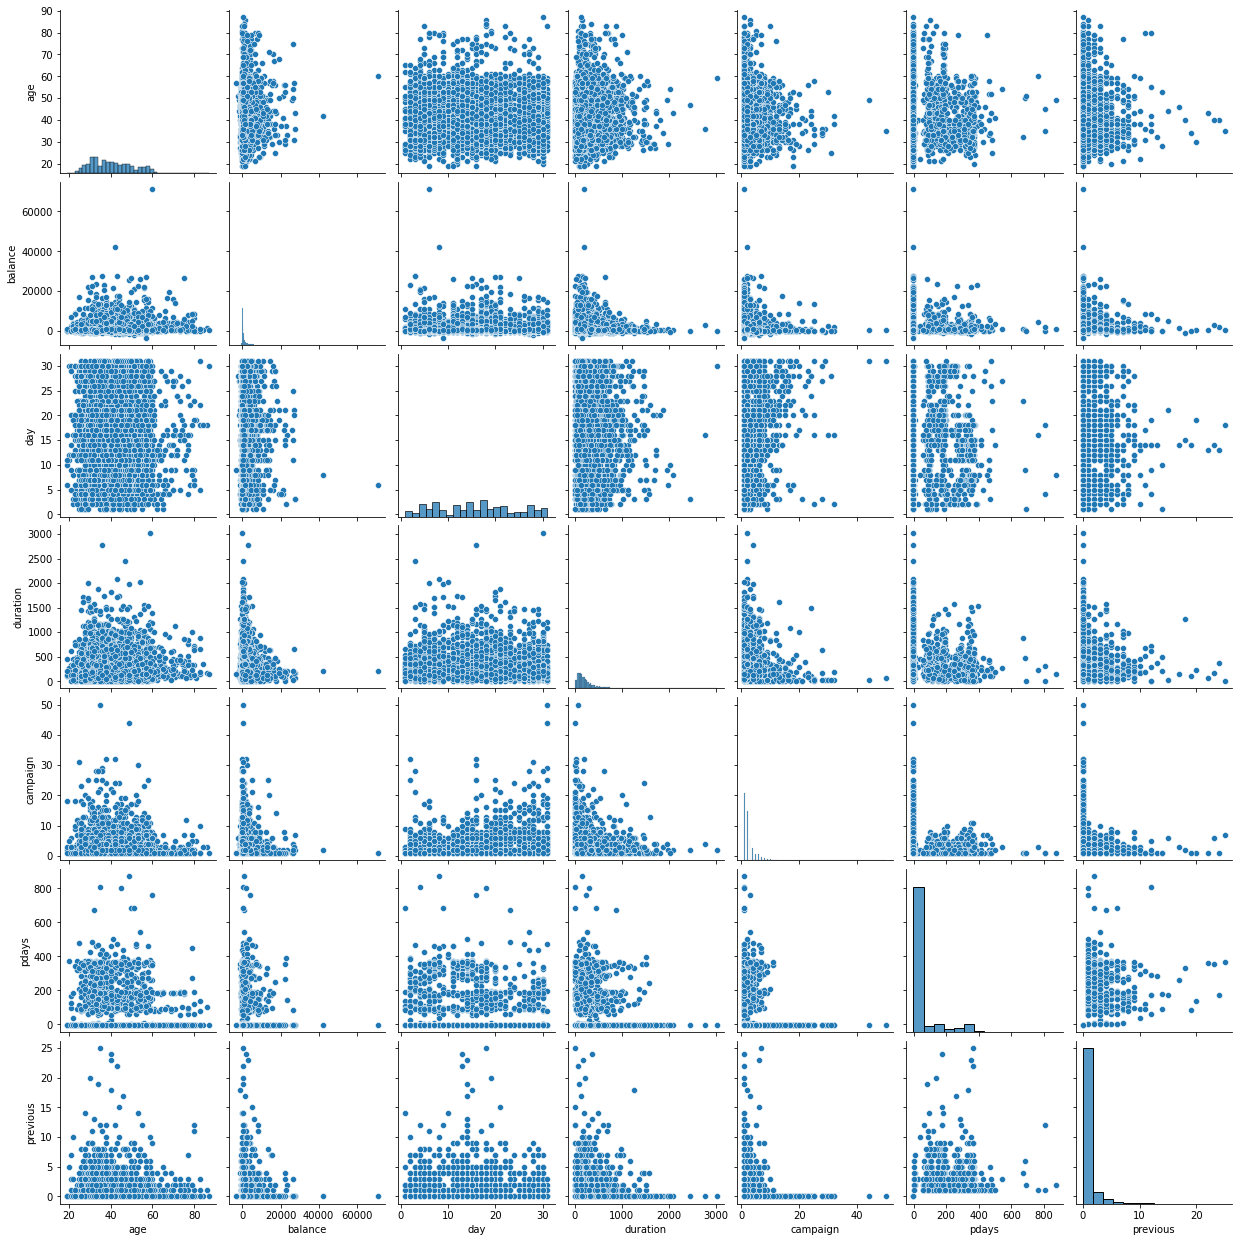

In [242]:
sns.pairplot(df[numerical_cols_to_plot])

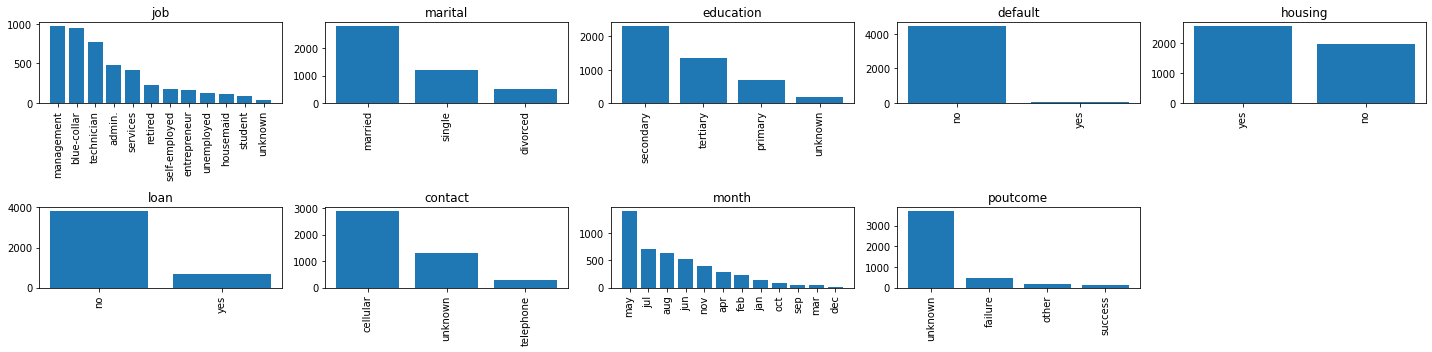

In [243]:
categorical_cols_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome']
fig, ax = plt.subplots(2,5, figsize=(20,5)) 

for idx, (col, axs) in enumerate(zip(categorical_cols_to_plot, ax.flatten())): 
    dftemp = df[col].value_counts() 
    axs.bar(dftemp.index, list(dftemp)) 
    axs.set_title(col)
    axs.tick_params(axis='x', labelrotation=90)

else: 
  [axs.set_visible(False) for axs in ax.flatten()[idx+1:]] 

plt.tight_layout() 
plt.show()

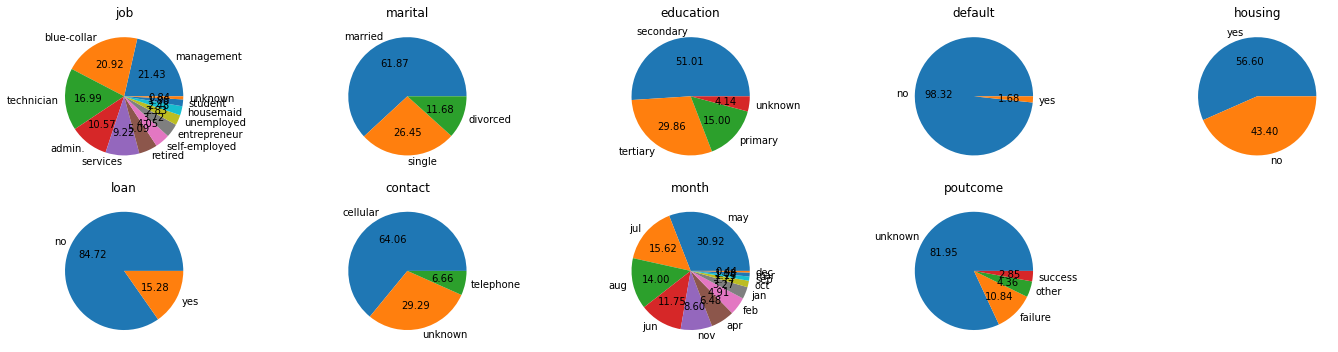

In [244]:
categorical_cols_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome'] 

fig, ax = plt.subplots(2,5, figsize=(20,5)) 

for idx, (col, axs) in enumerate(zip(categorical_cols_to_plot, ax.flatten())): 
    dftemp = df[col].value_counts()
    axs.pie(list(dftemp), labels=dftemp.index, autopct='%.2f') 
    axs.set_title(col)

else: 
  [axs.set_visible(False) for axs in ax.flatten()[idx+1:]] 

plt.tight_layout() 
plt.show()

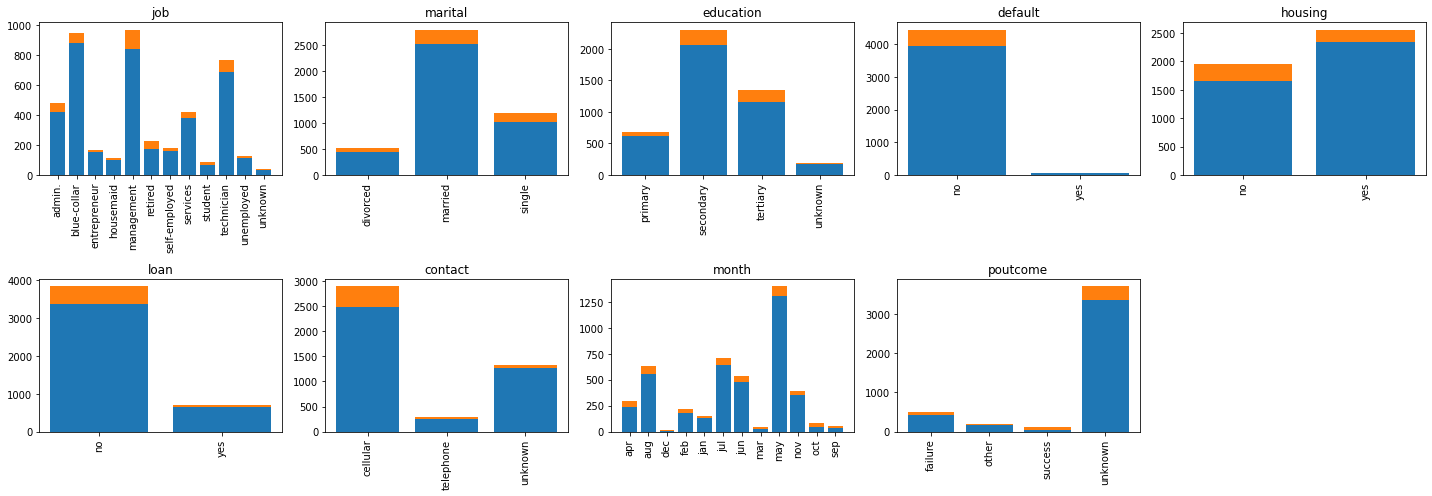

In [245]:
categorical_cols_to_plot = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact','month','poutcome'] 

fig, ax = plt.subplots(2,5, figsize=(20,7)) 

for idx, (col, axs) in enumerate(zip(categorical_cols_to_plot, ax.flatten())): 
    dftemp = df.groupby([col,'y']).size().unstack()
    axs.bar(dftemp.index, dftemp['no'], label='no') 
    axs.bar(dftemp.index, dftemp['yes'], label='yes', bottom=dftemp['no']) 
    axs.set_title(col)
    axs.tick_params(axis='x', labelrotation=90)

else: 
  [axs.set_visible(False) for axs in ax.flatten()[idx+1:]] 

plt.tight_layout() 
plt.show()

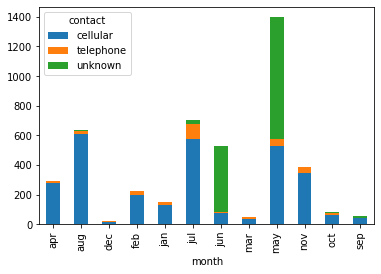

In [246]:
df.groupby(['month','contact']).size().unstack().plot(kind='bar', stacked=True)

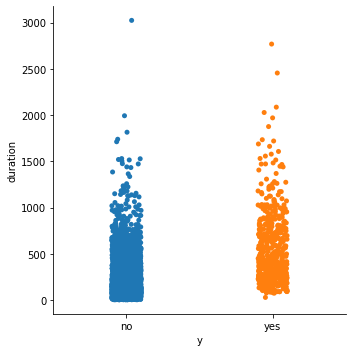

In [247]:
sns.catplot(x='y', y='duration', data=df)

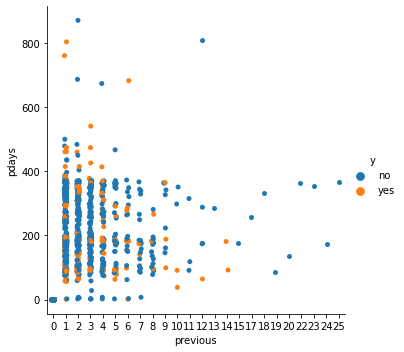

In [248]:
sns.catplot(x='previous', y='pdays', hue='y', data=df)

In [249]:
objList = df.select_dtypes(include = "object").columns
print (objList)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'y'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        4521 non-null   int64
 1   job        4521 non-null   int64
 2   marital    4521 non-null   int64
 3   education  4521 non-null   int64
 4   default    4521 non-null   int64
 5   balance    4521 non-null   int64
 6   housing    4521 non-null   int64
 7   loan       4521 non-null   int64
 8   contact    4521 non-null   int64
 9   day        4521 non-null   int64
 10  month      4521 non-null   int64
 11  duration   4521 non-null   int64
 12  campaign   4521 non-null   int64
 13  pdays      4521 non-null   int64
 14  previous   4521 non-null   int64
 15  poutcome   4521 non-null   int64
 16  y          4521 non-null   int64
dtypes: int64(17)
memory usage: 600.

In [250]:
X=df.drop(['y'],axis=1)
Y=df['y']

corr_matrix = df.corr(method='pearson')

import numpy as np
upper_corr_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool)) #Retain upper triangular values of correlation matrix and make Lower triangular values Null

unique_corr_pairs = upper_corr_matrix.unstack().dropna() #Convert to 1-D series

sorted_matrix = unique_corr_pairs.sort_values() #Sort correlation pairs
print(sorted_matrix)

poutcome  pdays      -0.859245
          previous   -0.636372
marital   age        -0.381485
pdays     contact    -0.243223
housing   age        -0.193888
                        ...   
month     housing     0.266630
poutcome  contact     0.267173
month     contact     0.370077
y         duration    0.401118
previous  pdays       0.577562
Length: 136, dtype: float64


In [251]:
corr_target = abs(corr_matrix["y"])

relevant_features = corr_target[corr_target<0.05].sort_values() 
relevant_features

default      0.001303
day          0.011244
marital      0.015042
balance      0.017905
job          0.027401
month        0.040933
education    0.042987
age          0.045092
Name: y, dtype: float64

In [315]:
X=df.drop(['y','default','day','marital','balance'],axis=1)
Y=df['y']

from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

X_new = pd.DataFrame(mm.fit_transform(X))

from sklearn import model_selection
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, Y, train_size=0.7, random_state=42, stratify=Y)

In [316]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Activation,Dropout
from scikeras.wrappers import KerasClassifier
import numpy

def create_model(
                 optimizer='adam',
                 activation='sigmoid',
                 dropout_rate=0.0                                                                             
                ):
    model = Sequential()
    model.add(Dense(200,input_dim=12,activation=activation))    #input layer
    model.add(Dense(150,activation=activation))                 #first hidden layer 
    model.add(Dense(100,activation=activation))                 #second hidden layer
    model.add(Dense(200,activation=activation))                 #third hidden layer
    model.add(Dense(1,activation=activation))                   #output layer
    model.compile(optimizer = optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, 
                        verbose=0,
                        dropout_rate=0.5
                        )

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=100)

batch_size=[20,40,60,80,100]
epochs=[10,20,30]
#optimizer=['Adadelta','Adagrad','Adam','Adamax','Nadam','RMSprop','SGD']
#learn_rate=[0.1,0.01,0.001]
#momentum= [0.0,0.2,0.4,0.6,0.8,0.9]                              
#init_mode=['glorot_normal','glorot_uniform','he_normal','he_uniform','lecun_uniform','normal','uniform','zero']                       
#activation=['hard_sigmoid','linear','relu','sigmoid','tanh']                          
dropout_rate=[0.5,0.6,0.7,0.8]  
#dropout_rate=[0.2,0.4,0.6]                         
#weight_constraint=[1,2,3,4,5] 

param_grid = dict(
                    batch_size=batch_size, 
                    epochs=epochs,
                    #optimizer=optimizer,
                    #learn_rate=learn_rate,
                    #momentum=momentum,                             
                    #init_mode=init_mode,                       
                    #activation=activation,                         
                    dropout_rate=dropout_rate                       
                    #weight_constraint= weight_constraint
                  )
                    
grid = GridSearchCV(
                    model,
                    param_grid=param_grid,
                    refit=True,
                    n_jobs=-1,
                    cv=3,
                    verbose=0                  
                    )

grid_result = grid.fit(X_train,y_train)

print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')

Best Accuracy for 0.8897 using {'batch_size': 20, 'dropout_rate': 0.5, 'epochs': 20}


In [319]:
def create_model(
                 optimizer='adam',                           
                 activation='sigmoid',                          
                 dropout_rate=0.0                            
                ):
    model = Sequential()
    model.add(Dense(200,input_dim=12,activation=activation)) 
    model.add(Dense(150,activation=activation))  
    model.add(Dense(100,activation=activation))  
    model.add(Dense(200,activation=activation)) 
    model.add(Dense(1,activation=activation)) 
    model.compile(optimizer = optimizer,
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model


model = KerasClassifier(
                        model=create_model,
                        verbose=0,
                        dropout_rate=0.5
                        )

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=20, batch_size=20)

KerasClassifier(
	model=<function create_model at 0x7f841e1caf80>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
	dropout_rate=0.5
	class_weight=None
)

In [320]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")

precision_recall_fscore_support(y_test, y_pred)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      1201
           1       0.46      0.33      0.38       156

    accuracy                           0.88      1357
   macro avg       0.69      0.64      0.66      1357
weighted avg       0.86      0.88      0.87      1357

